Final Accuracy: 0.33


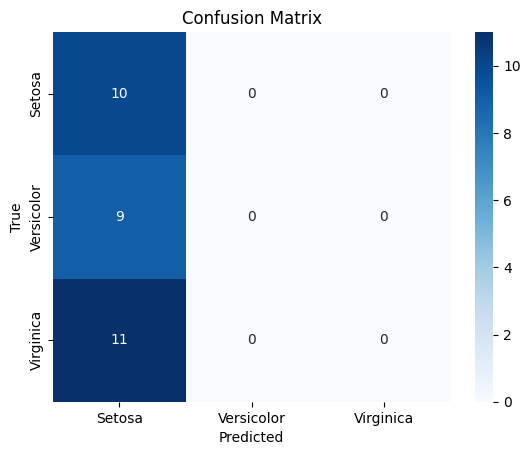

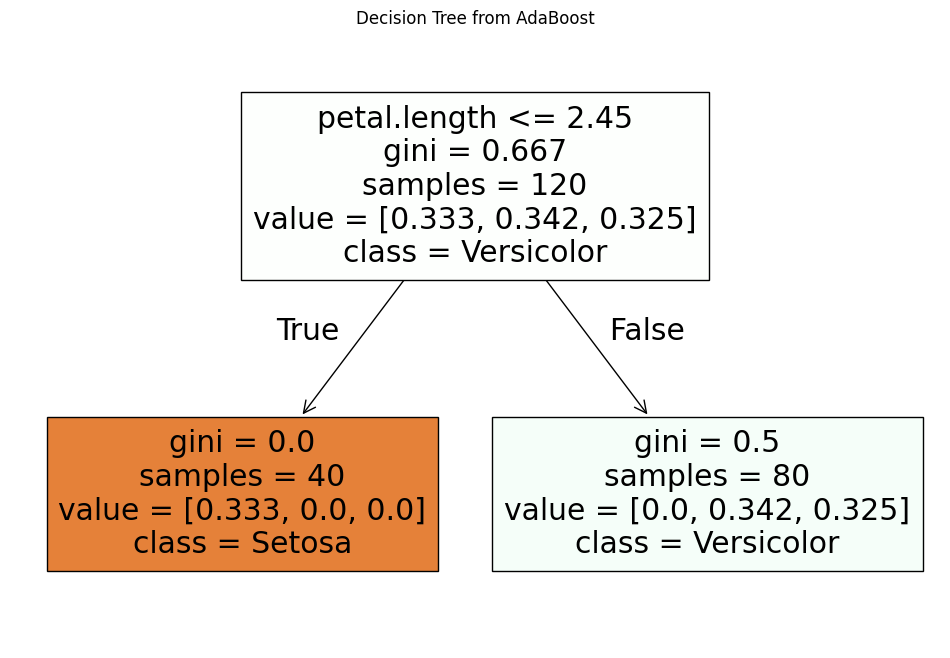

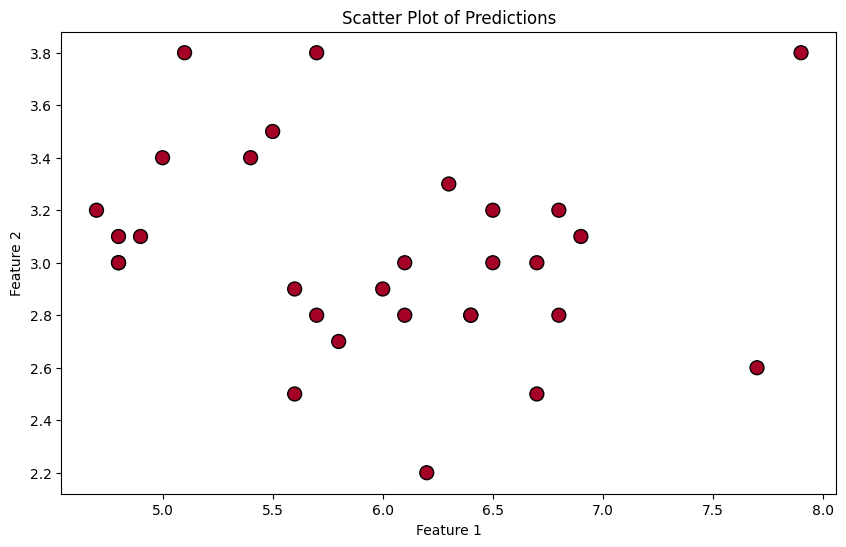

In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Prepare Data
df = pd.read_csv('iris.csv')  # Ensure this is the correct path to your dataset
X = df.drop('variety', axis=1).values  # Replace 'variety' with your actual target column name
y = df['variety'].values

# Convert target values to numeric if necessary
y = np.where(y == 'Setosa', 1, np.where(y == 'Versicolor', 2, 3))  # Adjust this mapping as needed

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Parameters
n_estimators = 50
n_samples = X_train.shape[0]
weights = np.ones(n_samples) / n_samples

# Train Weak Classifiers
classifiers = []
alphas = []

for _ in range(n_estimators):
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X_train, y_train, sample_weight=weights)

    y_pred = clf.predict(X_train)
    err = np.sum(weights * (y_pred != y_train)) / np.sum(weights)
    alpha = 0.5 * np.log((1 - err) / (err + 1e-10))

    weights *= np.exp(-alpha * (y_train == y_pred))
    weights /= np.sum(weights)

    classifiers.append(clf)
    alphas.append(alpha)

# Make Predictions
def predict(X):
    pred_score = np.zeros(X.shape[0])
    for clf, alpha in zip(classifiers, alphas):
        pred_score += alpha * clf.predict(X)
    return np.sign(pred_score)

# Evaluate the Model
y_pred_test = predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Output Results
print(f'Final Accuracy: {accuracy:.2f}')

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'],
             yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualizing Decision Trees
plt.figure(figsize=(12, 8))
plot_tree(classifiers[0], filled=True, feature_names=df.columns[:-1], class_names=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Decision Tree from AdaBoost')
plt.show()

# Scatter Plot of Predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='RdYlBu', edgecolor='k', s=100)
plt.title('Scatter Plot of Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



